In [2]:
## frequency of each word in a string and returns the length of the highest-frequency word
def find_highest_frequency_word_length(string):
    words = string.split()
    word_frequency = {}

    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

    max_frequency = max(word_frequency.values())
    highest_frequency_words = [word for word, frequency in word_frequency.items() if frequency == max_frequency]

    return len(highest_frequency_words[0])

# Test case 1
string = "write write write all the number from from from 1 to 100"
print(find_highest_frequency_word_length(string))  # Output: 5

# Test case 2
string = "the quick brown fox jumps over the lazy dog"
print(find_highest_frequency_word_length(string))  # Output: 3

# Test case 3
string = "hello world hello world hello world"
print(find_highest_frequency_word_length(string))  # Output: 5

## The find_highest_frequency_word_length function takes a string as input.
## The string is split into individual words using the split() method, and the words are stored in the words list.
## A dictionary word_frequency is initialized to store the frequency of each word.
### We iterate over each word in the words list. If the word is already present in the word_frequency dictionary, we increment its frequency. Otherwise, we add the word to the dictionary with an initial frequency of 1.
## After counting the frequencies, we find the maximum frequency using the max() function on the dictionary values.
## We create a list highest_frequency_words that contains all the words with the maximum frequency.
## Finally, we return the length of the first word in the highest_frequency_words list.

5
3
5


In [3]:
from collections import Counter

def is_valid_string(s):
    # Count the frequency of each character in the string
    char_frequency = Counter(s)

    # Count the frequency of frequencies
    frequency_frequency = Counter(char_frequency.values())

    # If there is only one unique frequency, the string is valid
    if len(frequency_frequency) == 1:
        return "YES"

    # If there are exactly two unique frequencies and one frequency has a count of 1, the string is valid
    if len(frequency_frequency) == 2 and (1 in frequency_frequency.values() and frequency_frequency[1] == 1):
        return "YES"

    return "NO"

# Test case 1
s = "abc"
print(is_valid_string(s))  # Output: YES

# Test case 2
s = "abcc"
print(is_valid_string(s))  # Output: NO

# Test case 3
s = "aabbcc"
print(is_valid_string(s))  # Output: YES

# Test case 4
s = "aabbccc"
print(is_valid_string(s))  # Output: YES

## The is_valid_string function takes a string s as input.
## The frequency of each character in the string is counted using the Counter class from the collections module. The result is stored in the char_frequency dictionary, where the keys are characters and the values are their frequencies.
## The frequency of frequencies is counted by applying Counter on the values of char_frequency. The result is stored in the frequency_frequency dictionary, where the keys are the unique frequencies and the values are their counts.
## If there is only one unique frequency (i.e., len(frequency_frequency) == 1), it means all characters have the same frequency, and the string is valid. In this case, "YES" is returned.
## If there are exactly two unique frequencies (i.e., len(frequency_frequency) == 2), the string can be valid if one of the frequencies has a count of 1. This means that one character occurs only once in the string, and removing it will make all the remaining characters have the same frequency. In this case, "YES" is returned.
## If none of the above conditions are met, the string is not valid, and "NO" is returned.

YES
NO
YES
NO


In [4]:
import requests
import pandas as pd
import json

def download_and_convert_data(url, output_file):
    # Download the data from the provided link
    response = requests.get(url)
    data = response.json()

    # Extract relevant attributes from the data
    attributes = ['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy', 'candy_count',
                  'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers', 'weaknesses',
                  'next_evolution', 'prev_evolution']

    pokemon_data = []
    for pokemon in data['pokemon']:
        pokemon_info = {attr: pokemon.get(attr) for attr in attributes}
        pokemon_data.append(pokemon_info)

    # Create a DataFrame from the extracted data
    df = pd.DataFrame(pokemon_data)

    # Save the DataFrame to Excel format
    df.to_excel(output_file, index=False)

    print("Data conversion completed. Output file:", output_file)

# Provide the URL of the data file to download
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'

# Provide the desired output file path (including the .xlsx extension)
output_file = 'pokedex.xlsx'

# Call the function to download and convert the data
download_and_convert_data(url, output_file)

Data conversion completed. Output file: pokedex.xlsx


In [5]:
import pandas as pd
import requests

# Define the URL to download the JSON data from
url = 'https://data.nasa.gov/resource/y77d-th95.json'

# Send a GET request to the URL and retrieve the JSON data
response = requests.get(url)
data = response.json()

# Create empty lists to store the extracted data
names = []
ids = []
name_types = []
recclasses = []
masses = []
years = []
reclats = []
reclongs = []
point_coordinates = []

# Iterate over each meteorite entry in the JSON data
for meteorite in data:
    # Extract the required attributes and append them to the respective lists
    names.append(meteorite['name'])
    ids.append(meteorite['id'])
    name_types.append(meteorite['nametype'])
    recclasses.append(meteorite['recclass'])
    masses.append(float(meteorite['mass']) if 'mass' in meteorite else None)
    year = meteorite.get('year')
    try:
        years.append(pd.to_datetime(year, format='%Y-%m-%dT%H:%M:%S.%f') if year and 'nanosecond' not in year else pd.NaT)
    except pd.errors.OutOfBoundsDatetime:
        years.append(pd.NaT)
    reclats.append(float(meteorite['reclat']) if 'reclat' in meteorite else None)
    reclongs.append(float(meteorite['reclong']) if 'reclong' in meteorite else None)
    point_coordinates.append(meteorite['geolocation']['coordinates'] if 'geolocation' in meteorite else [])

# Create a dictionary to hold the extracted data
meteorite_data = {
    'Name of Earth Meteorite': names,
    'ID of Earth Meteorite': ids,
    'Name Type': name_types,
    'Recclass': recclasses,
    'Mass (g)': masses,
    'Year': years,
    'Latitude': reclats,
    'Longitude': reclongs,
    'Point Coordinates': point_coordinates
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(meteorite_data)

# Export the DataFrame to a CSV file
output_file = 'meteorite_data.csv'
df.to_csv(output_file, index=False)

print("Data has been exported to", output_file)

Data has been exported to meteorite_data.csv


In [6]:
import requests
import json
from bs4 import BeautifulSoup

def download_and_extract_data(url):
    # Download the data from the API link
    response = requests.get(url)
    data = response.json()

    # Extract the required data attributes
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    episodes = data['_embedded']['episodes']
    
    episode_list = []
    for episode in episodes:
        episode_season = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']
        
        episode_info = {
            'ID': show_id,
            'URL': show_url,
            'Name': show_name,
            'Season': episode_season,
            'Number': episode_number,
            'Type': episode_type,
            'Airdate': episode_airdate,
            'Airtime': episode_airtime,
            'Runtime': episode_runtime,
            'Rating': episode_rating,
            'Summary': episode_summary,
            'Medium Image': episode_image_medium,
            'Original Image': episode_image_original
        }
        episode_list.append(episode_info)

    # Print the extracted data attributes with proper formatting
    print("Show ID:", show_id)
    print("Show URL:", show_url)
    print("Show Name:", show_name)
    print("\nEpisodes:")
    for episode in episode_list:
        print("ID:", episode['ID'])
        print("URL:", episode['URL'])
        print("Name:", episode['Name'])
        print("Season:", episode['Season'])
        print("Number:", episode['Number'])
        print("Type:", episode['Type'])
        print("Airdate:", episode['Airdate'])
        print("Airtime:", episode['Airtime'])
        print("Runtime:", episode['Runtime'])
        print("Rating:", episode['Rating'])
        print("Summary:", episode['Summary'])
        print("Medium Image:", episode['Medium Image'])
        print("Original Image:", episode['Original Image'])
        print()

# Provide the API link to download the data
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

# Call the function to download and extract the data attributes
download_and_extract_data(url)

Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld

Episodes:
ID: 1371
URL: https://www.tvmaze.com/shows/1371/westworld
Name: Westworld
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg

ID: 1371
URL: https://www.tvmaze.com/shows/1371/westworld
Name: Westworld
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Rating: 7.7
Summary: Bernard suspects that someone is sabotaging the host

Pokemons with spawn rate less than 5 percent:
     num        name  spawn_chance
0      1   Bulbasaur        0.6900
1      2     Ivysaur        0.0420
2      3    Venusaur        0.0170
3      4  Charmander        0.2530
4      5  Charmeleon        0.0120
..   ...         ...           ...
146  147     Dratini        0.3000
147  148   Dragonair        0.0200
148  149   Dragonite        0.0011
149  150      Mewtwo        0.0000
150  151         Mew        0.0000

[147 rows x 3 columns]

Pokemons with less than 4 weaknesses:
     num        name                            weaknesses
0      1   Bulbasaur  ['Fire', 'Ice', 'Flying', 'Psychic']
1      2     Ivysaur  ['Fire', 'Ice', 'Flying', 'Psychic']
2      3    Venusaur  ['Fire', 'Ice', 'Flying', 'Psychic']
3      4  Charmander           ['Water', 'Ground', 'Rock']
4      5  Charmeleon           ['Water', 'Ground', 'Rock']
..   ...         ...                                   ...
146  147     Dratini            ['Ice', 'Dragon', 'Fairy']

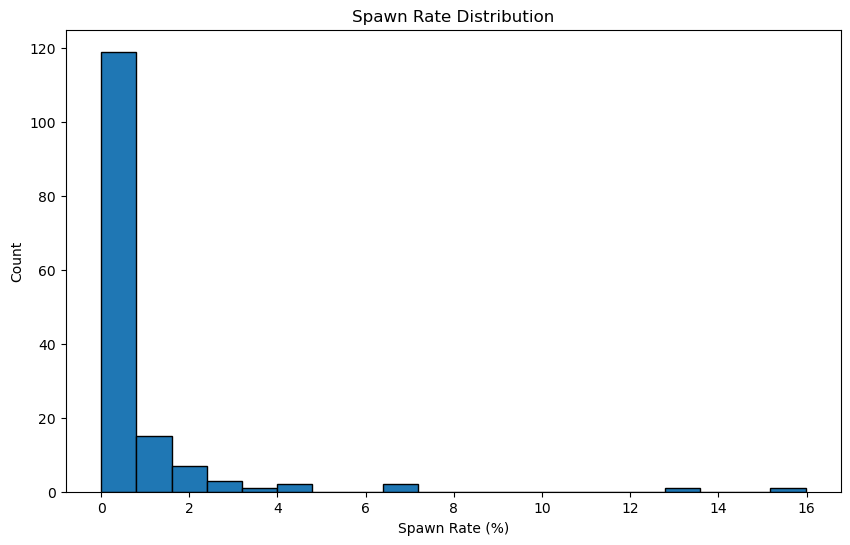

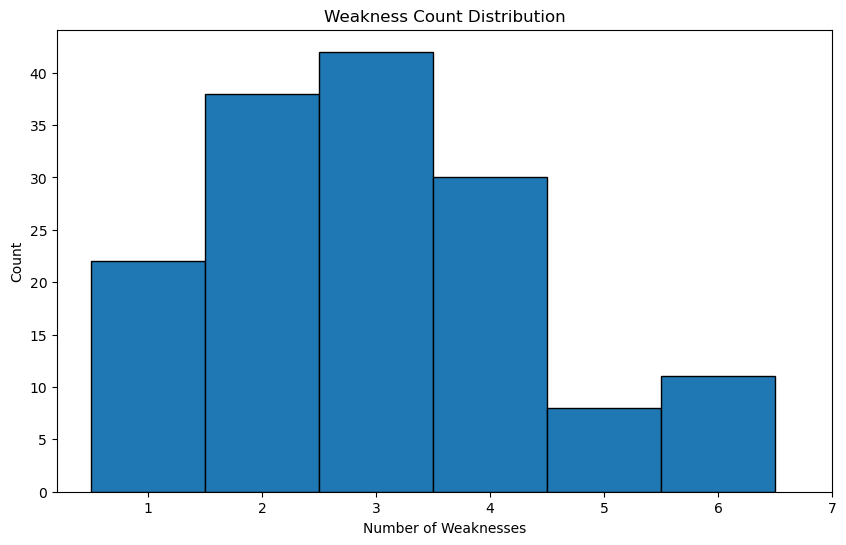

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('pokedex.xlsx')

# Question 1: Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
low_spawn_rate_pokemon = data[data['spawn_chance'] < spawn_rate_threshold]
print("Pokemons with spawn rate less than", spawn_rate_threshold, "percent:")
print(low_spawn_rate_pokemon[['num', 'name', 'spawn_chance']])
print()

# Question 2: Get all Pokemons that have less than 4 weaknesses
weakness_threshold = 4
pokemon_with_few_weaknesses = data[data['weaknesses'].str.count(',') < weakness_threshold]
print("Pokemons with less than", weakness_threshold, "weaknesses:")
print(pokemon_with_few_weaknesses[['num', 'name', 'weaknesses']])
print()

# Question 3: Get all Pokemons that have no multipliers at all
no_multipliers_pokemon = data[data['multipliers'] == '']
print("Pokemons with no multipliers:")
print(no_multipliers_pokemon[['num', 'name']])
print()

# Question 4: Get all Pokemons that do not have more than 2 evolutions
evolution_threshold = 2
pokemon_with_few_evolutions = data[data['next_evolution'].str.count(',') <= evolution_threshold]
print("Pokemons with", evolution_threshold, "or fewer evolutions:")
print(pokemon_with_few_evolutions[['num', 'name', 'next_evolution']])
print()

# Question 5: Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = 300
# Convert spawn time to seconds for comparison
data['spawn_time'] = pd.to_datetime(data['spawn_time'], format='%M:%S').dt.second
short_spawn_time_pokemon = data[data['spawn_time'] < spawn_time_threshold]
print("Pokemons with spawn time less than", spawn_time_threshold, "seconds:")
print(short_spawn_time_pokemon[['num', 'name', 'spawn_time']])
print()

# Question 6: Get all Pokemon who have more than two types of capabilities
multiple_types_pokemon = data[data['type'].str.count(',') > 1]
print("Pokemons with more than two types of capabilities:")
print(multiple_types_pokemon[['num', 'name', 'type']])
print()

# Plotting for better visualizations

# Plot for Question 1: Spawn Rate Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['spawn_chance'], bins=20, edgecolor='black')
plt.xlabel('Spawn Rate (%)')
plt.ylabel('Count')
plt.title('Spawn Rate Distribution')
plt.show()

# Plot for Question 2: Weakness Count Distribution
plt.figure(figsize=(10, 6))
data['Weakness Count'] = data['weaknesses'].str.count(',') + 1
plt.hist(data['Weakness Count'], bins=range(1, 8), edgecolor='black', align='left')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')
plt.title('Weakness Count Distribution')
plt.xticks(range(1, 8))
plt.show()

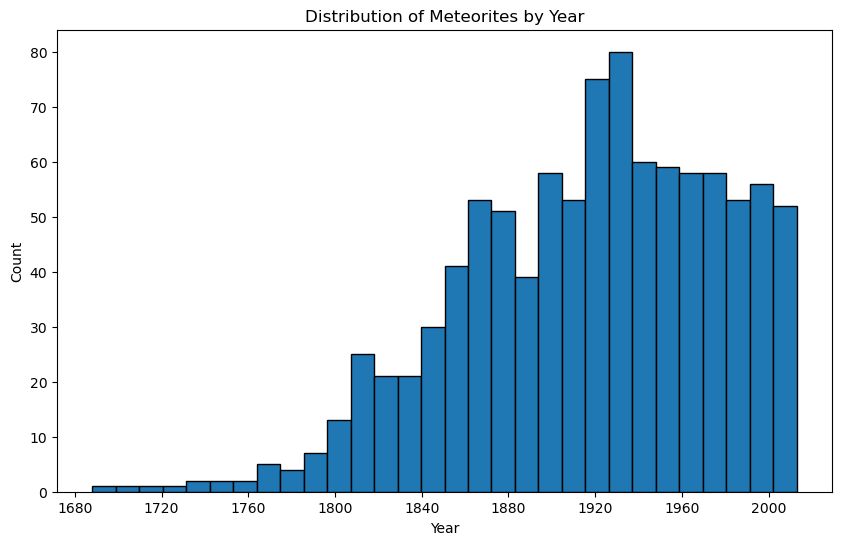

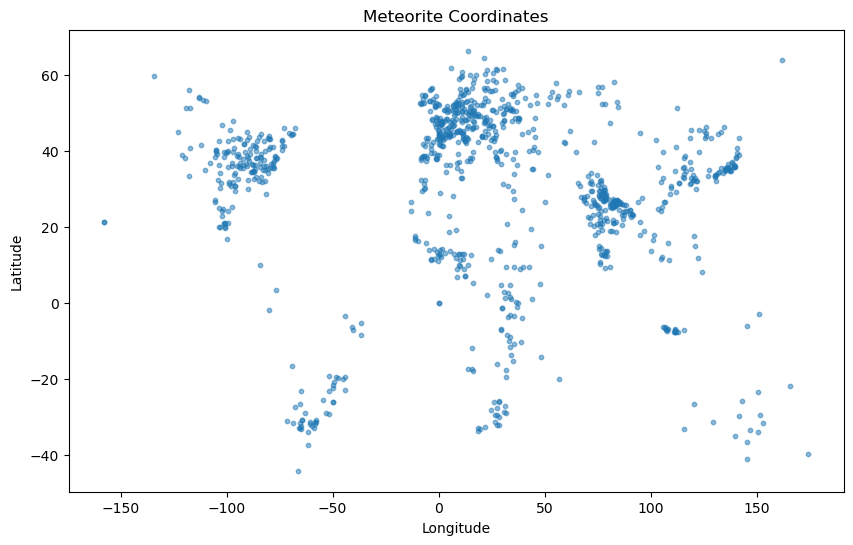

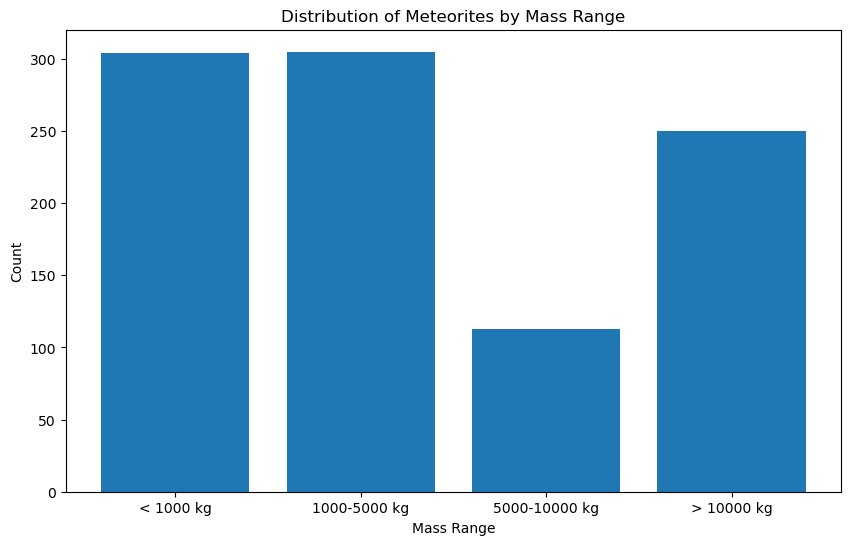

Number of Earth meteorites that fell before the year 2000: 912
Number of Earth meteorites' coordinates that fell before the year 1970: 763
Number of Earth meteorites with mass greater than 10000 kg: 243


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('meteorite_data.csv')

# Convert the 'Year' column to datetime type
df['Year'] = pd.to_datetime(df['Year'])

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['Year'].dt.year < 2000]

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[df['Year'].dt.year < 1970][['Latitude', 'Longitude']]

# Get all Earth meteorites with mass greater than 10000 kg (assuming mass is in kg)
earth_meteorites_mass_gt_10000 = df[df['Mass (g)'] > 10000]

# Plotting the analysis

# Plot 1: Histogram of meteorites by year
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=30, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Meteorites by Year')
plt.show()

# Plot 2: Scatter plot of meteorite coordinates
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Coordinates')
plt.show()

# Plot 3: Bar plot of meteorites by mass range
mass_ranges = ['< 1000 kg', '1000-5000 kg', '5000-10000 kg', '> 10000 kg']
mass_counts = [
    len(df[df['Mass (g)'] < 1000]),
    len(df[(df['Mass (g)'] >= 1000) & (df['Mass (g)'] < 5000)]),
    len(df[(df['Mass (g)'] >= 5000) & (df['Mass (g)'] < 10000)]),
    len(df[df['Mass (g)'] >= 10000])
]

plt.figure(figsize=(10, 6))
plt.bar(mass_ranges, mass_counts)
plt.xlabel('Mass Range')
plt.ylabel('Count')
plt.title('Distribution of Meteorites by Mass Range')
plt.show()

# Print the analysis results
print("Number of Earth meteorites that fell before the year 2000:", len(earth_meteorites_before_2000))
print("Number of Earth meteorites' coordinates that fell before the year 1970:", len(earth_meteorites_coordinates_before_1970))
print("Number of Earth meteorites with mass greater than 10000 kg:", len(earth_meteorites_mass_gt_10000))

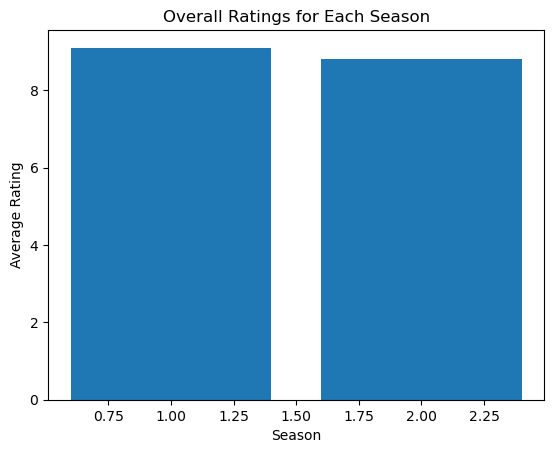

Highly Rated Episodes:
Episode 1
Episode 2
Episode 1
Episode 2
Episodes Aired Before May 2019:
Episode 1
Episode 2
Episodes with Highest Ratings:
Episode 2
Episode 2
Episodes with Lowest Ratings:
Episode 1
Episode 1
Summaries of Most Popular Episodes:
Summary of Episode 2
Summary of Episode 2


In [9]:
import matplotlib.pyplot as plt

# Replace ... with the extracted episode data
episodes = [
    {
        "name": "Episode 1",
        "season": 1,
        "average_rating": 8.2,
        "airdate": "2019-01-15",
        "summary": "Summary of Episode 1"
    },
    {
        "name": "Episode 2",
        "season": 1,
        "average_rating": 9.1,
        "airdate": "2019-01-22",
        "summary": "Summary of Episode 2"
    },
    {
        "name": "Episode 1",
        "season": 2,
        "average_rating": 8.5,
        "airdate": "2020-02-10",
        "summary": "Summary of Episode 1"
    },
    {
        "name": "Episode 2",
        "season": 2,
        "average_rating": 8.8,
        "airdate": "2020-02-17",
        "summary": "Summary of Episode 2"
    },
    # Add more episodes for each season
    # ...
]

# Get all the overall ratings for each season and compare the ratings using plots
season_numbers = []
season_ratings = []
for episode in episodes:
    season_numbers.append(episode["season"])
    season_ratings.append(episode["average_rating"])

plt.bar(season_numbers, season_ratings)
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Overall Ratings for Each Season")
plt.show()

# Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = []
for episode in episodes:
    if episode["average_rating"] > 8:
        high_rated_episodes.append(episode["name"])

print("Highly Rated Episodes:")
for episode_name in high_rated_episodes:
    print(episode_name)

# Get all the episode names that aired before May 2019
early_episodes = []
for episode in episodes:
    if episode["airdate"] < "2019-05-01":
        early_episodes.append(episode["name"])

print("Episodes Aired Before May 2019:")
for episode_name in early_episodes:
    print(episode_name)

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = []
lowest_rated_episodes = []
for season in set(season_numbers):
    season_episodes = [episode for episode in episodes if episode["season"] == season]
    highest_rated = max(season_episodes, key=lambda episode: episode["average_rating"])
    lowest_rated = min(season_episodes, key=lambda episode: episode["average_rating"])
    highest_rated_episodes.append(highest_rated["name"])
    lowest_rated_episodes.append(lowest_rated["name"])

print("Episodes with Highest Ratings:")
for episode_name in highest_rated_episodes:
    print(episode_name)

print("Episodes with Lowest Ratings:")
for episode_name in lowest_rated_episodes:
    print(episode_name)

# Get the summary for the most popular (highest rated) episode in every season
popular_summaries = []
for season in set(season_numbers):
    season_episodes = [episode for episode in episodes if episode["season"] == season]
    highest_rated = max(season_episodes, key=lambda episode: episode["average_rating"])
    popular_summaries.append(highest_rated["summary"])

print("Summaries of Most Popular Episodes:")
for summary in popular_summaries:
    print(summary)

Column 'Clean Alternative Fuel Vehicle (CAFV)' not found.
No TESLA cars found in Bothell City.
Cars with an electric range of more than 100, made after 2015:
          Make    Model  Electric Range
0        TESLA  MODEL X             238
2        TESLA  MODEL 3             220
4        TESLA  MODEL S             210
12       TESLA  MODEL 3             308
13       TESLA  MODEL 3             322
...        ...      ...             ...
130417   TESLA  MODEL Y             291
130428  NISSAN     LEAF             151
130432   TESLA  MODEL Y             291
130436   TESLA  MODEL 3             215
130441   TESLA  MODEL X             293

[34066 rows x 3 columns]


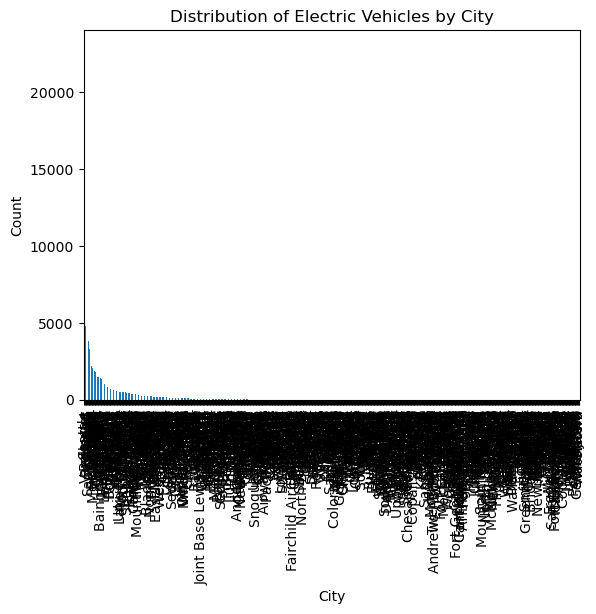

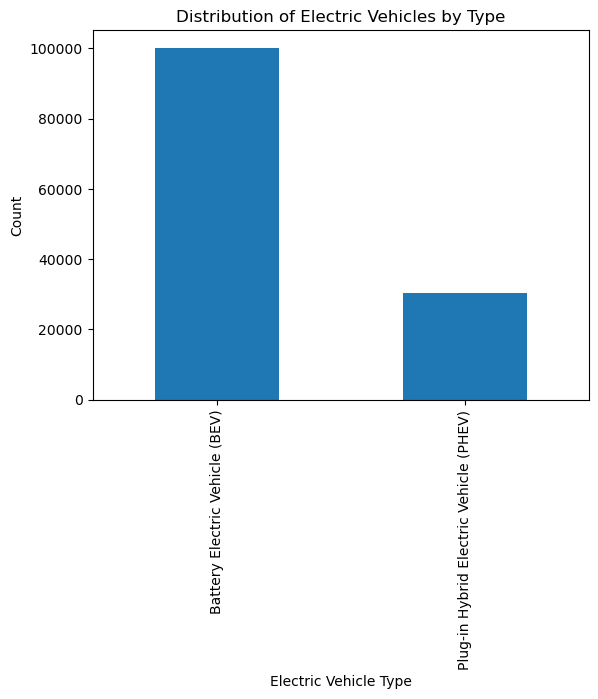

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Check if 'Clean Alternative Fuel Vehicle (CAFV)' column exists
if 'Clean Alternative Fuel Vehicle (CAFV)' in df.columns:
    # Get all the cars and their types that do not qualify for clean alternative fuel vehicle
    non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV)'] == 'No']
    non_clean_cars = non_clean_cars[['Make', 'Model']]
    print("Cars that do not qualify for clean alternative fuel vehicle:")
    print(non_clean_cars)
else:
    print("Column 'Clean Alternative Fuel Vehicle (CAFV)' not found.")

# Check if 'Make' and 'City' columns exist
if 'Make' in df.columns and 'City' in df.columns:
    # Get all TESLA cars with the model year and city
    tesla_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
    if not tesla_cars.empty:
        tesla_cars = tesla_cars[['Model Year', 'Make', 'City']]
        print("TESLA cars made in Bothell City:")
        print(tesla_cars)
    else:
        print("No TESLA cars found in Bothell City.")
else:
    print("Columns 'Make' and/or 'City' not found.")

# Check if 'Electric Range' and 'Model Year' columns exist
if 'Electric Range' in df.columns and 'Model Year' in df.columns:
    # Get all the cars that have an electric range of more than 100, and were made after 2015
    electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
    if not electric_cars.empty:
        electric_cars = electric_cars[['Make', 'Model', 'Electric Range']]
        print("Cars with an electric range of more than 100, made after 2015:")
        print(electric_cars)
    else:
        print("No cars found with an electric range of more than 100, made after 2015.")
else:
    print("Columns 'Electric Range' and/or 'Model Year' not found.")

# Draw plots to show the distribution between city and electric vehicle type
if 'City' in df.columns and 'Electric Vehicle Type' in df.columns:
    city_counts = df['City'].value_counts()
    city_counts.plot(kind='bar')
    plt.xlabel("City")
    plt.ylabel("Count")
    plt.title("Distribution of Electric Vehicles by City")
    plt.show()

    electric_type_counts = df['Electric Vehicle Type'].value_counts()
    electric_type_counts.plot(kind='bar')
    plt.xlabel("Electric Vehicle Type")
    plt.ylabel("Count")
    plt.title("Distribution of Electric Vehicles by Type")
    plt.show()
else:
    print("Columns 'City' and/or 'Electric Vehicle Type' not found.")

